### Using model to select the features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
dataset=load_boston()
df=pd.DataFrame(dataset.data)
df.columns=dataset.feature_names
df.target=np.asarray(dataset.target)
df['price']=pd.Series(df.target)
df.head()

C:\Users\trilok\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [5]:
from sklearn.linear_model import Lasso

In [6]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mean_squared_error = np.mean((y_pred - y_test)**2)
print("MSE on test set",mean_squared_error)

MSE on test set 41.700096799949


In [7]:
lasso_coeff = pd.DataFrame()
lasso_coeff["columns"] = X_train.columns
lasso_coeff["Coefficient_estimate"]=pd.Series(lasso.coef_)
print(lasso_coeff)

    columns  Coefficient_estimate
0      CRIM             -0.058890
1        ZN              0.053177
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.679550
6       AGE              0.016841
7       DIS             -0.648766
8       RAD              0.198738
9       TAX             -0.013994
10  PTRATIO             -0.864220
11        B              0.006603
12    LSTAT             -0.731210


In [8]:
# here 'CHAS' is having very small value ,so we can eliminate it

## Using RF to select features

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(X_train,y_train)
importances = rf.feature_importances_

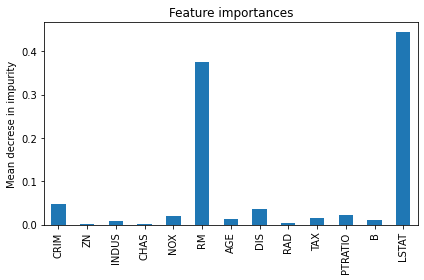

In [10]:
forest_importances = pd.Series(importances,index = X_train.columns)

fig,ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrese in impurity')
fig.tight_layout()

In [11]:
# here you can find CHAS ZN RAD has very less so we can consider it for removal